In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import label_binarize,LabelEncoder,StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC

In [2]:
data = pd.read_csv('./fetal_health (2).csv')
pd.set_option('display.max_columns',22)
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
data.duplicated().sum()

13

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(2113, 22)

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
sc = StandardScaler()

In [10]:
x = sc.fit_transform(x)

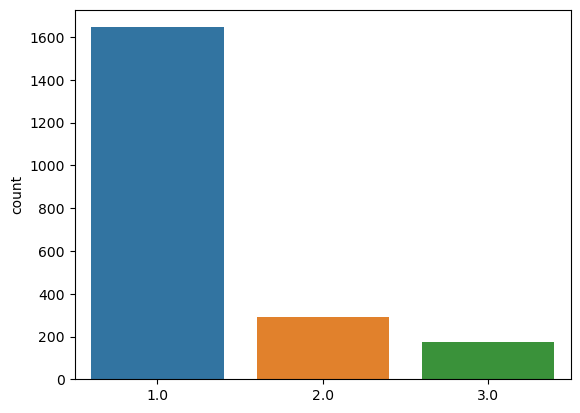

In [11]:
sns.countplot(x=y)
plt.show()

### treating imbalancce

In [12]:
smote = SMOTE()

In [13]:
x_smote,y_smote = smote.fit_resample(x,y)

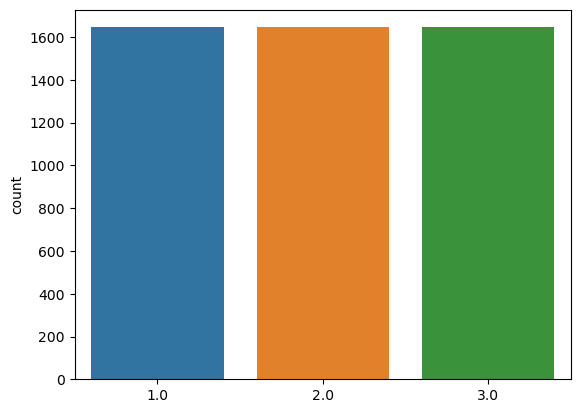

In [14]:
sns.countplot(x=y_smote)
plt.show()

In [15]:
models = {"LogisticRegression":LogisticRegression(),
          "RandomForestClassifier":RandomForestClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "KNeighborsClassifier":KNeighborsClassifier(),
          "LinearSVC":LinearSVC()
    
}

In [16]:
for name,model in models.items():
    scores = cross_val_score(model,x_smote,y_smote,scoring="accuracy",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    print("Mean score:",np.mean(scores)*100)
    print("*"*100)

Cross validation model:LogisticRegression
Mean score: 87.58472871209072
****************************************************************************************************
Cross validation model:RandomForestClassifier
Mean score: 95.60359198824023
****************************************************************************************************
Cross validation model:DecisionTreeClassifier
Mean score: 92.74724688144138
****************************************************************************************************
Cross validation model:AdaBoostClassifier
Mean score: 87.1400826140871
****************************************************************************************************
Cross validation model:GradientBoostingClassifier
Mean score: 94.34746368182901
****************************************************************************************************
Cross validation model:KNeighborsClassifier
Mean score: 93.13420272478669
**********************************************

### Selecting RandomForestClassifier

#### Binarizing target

In [26]:
x = x_smote 

In [27]:
y = y_smote 

In [28]:
y = label_binarize(y,classes=[1.,2.,3.])
n_classes = 3

In [29]:
data.fetal_health.unique()

array([2., 1., 3.])

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

### Initialising the classifier

In [31]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=43))

In [32]:
y_score = clf.fit(x_train,y_train).predict_proba(x_test)

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i],tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

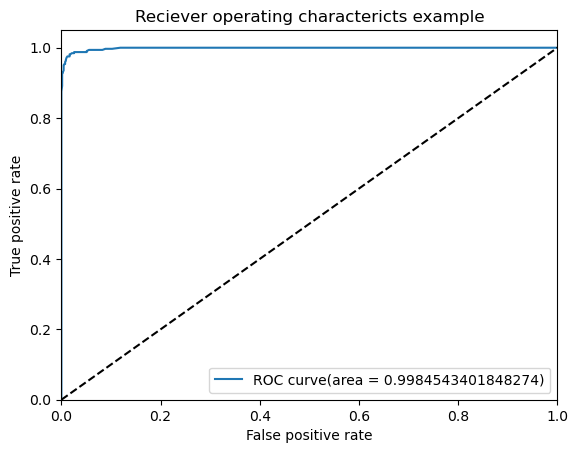

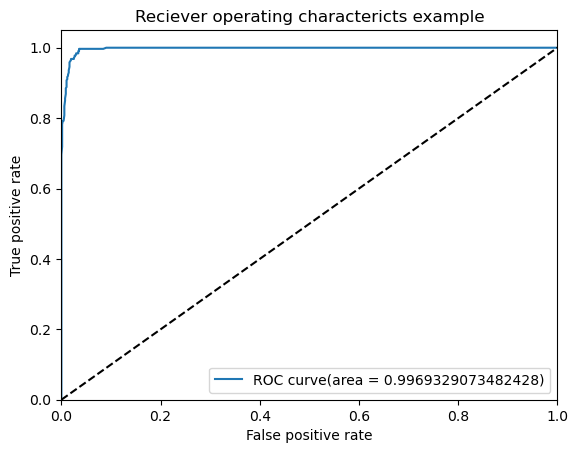

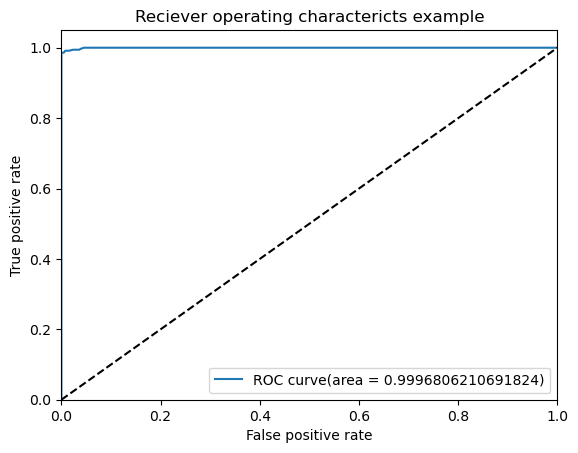

In [34]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label = "ROC curve(area = {})".format(roc_auc[i]))
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Reciever operating charactericts example")
    plt.legend(loc = "lower right")
    plt.show()